In [1]:
import csv
import ndjson
import os
import sys

In [2]:
base_path = os.getcwd().split('sliver-maestro')[0]
root_path = os.path.join(base_path, "sliver-maestro")
print("root_path: {}".format(root_path))

root_path: C:\Users\ozgur\Desktop\sandbox\sliver-maestro


In [3]:
sys.path.insert(1, root_path)
from src.utils.model_utils import *
from src.draw_model import *
from src.generate_images import *

In [4]:
categories_file = os.path.join(root_path, "src", "data", "categories.csv")

In [5]:
with open(categories_file, newline='') as f:
    reader = csv.reader(f)
    categories = {rows[0]:rows[0] for rows in reader}

#### Select a category to download images from 

In [6]:
print('Number of categories: %d' % len(categories))

Number of categories: 345


In [7]:
list(categories.keys())[:10]

['aircraft carrier',
 'airplane',
 'alarm clock',
 'ambulance',
 'angel',
 'animal migration',
 'ant',
 'anvil',
 'apple',
 'arm']

In [8]:
category = input("Selected category from the list above: ") or 'cat'
# Checking to see if the entered category is in the categories dictionary
assert categories.get(category)

Selected category from the list above: cat


In [9]:
print("Creating directories to save images, weights and the model ...")
src_list, dst_list, paths_dict = create_folders(root_path, category)

Creating directories to save images, weights and the model ...
folders are created...


In [10]:
option = input("Select a download method ... \n 1. Use Google Cloud credentials stored in a json file \n 2. Use gsutil in the notebook \n 3. Use gsutil in the terminal \n")

Select a download method ... 
 1. Use Google Cloud credentials stored in a json file 
 2. Use gsutil in the notebook 
 3. Use gsutil in the terminal 
3


In [11]:
if option == "1":
    download_data(src_list, dst_list)
elif option == "2":
    for (src_file, dst_file) in zip(src_list, dst_list): 
        print('gs://quickdraw_dataset/' + src_file, dst_file)
        !gsutil -m cp {'gs://quickdraw_dataset/' + src_file} {dst_file}
elif option == "3":
    print('Type the following in the terminal to download the files manually:')
    for (src_file, dst_file) in zip(src_list, dst_list):
        print("gsutil -m cp " + "gs://quickdraw_dataset/" + "{}".format(src_file) + " " + "{}".format(dst_file))

Type the following in the terminal to download the files manually:
gsutil -m cp gs://quickdraw_dataset/full/numpy_bitmap/cat.npy C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\input\cat\cat.npy
gsutil -m cp gs://quickdraw_dataset/full/raw/cat.ndjson C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\raw\cat\cat.ndjson


In [12]:
model_path = os.path.join(paths_dict['input_path'], category, category)

In [13]:
npy_data = np.load(paths_dict['base_input'] + '.npy', allow_pickle=True)

In [14]:
# load from file-like objects
with open(paths_dict['base_raw'] + '.ndjson') as f:
    ndjson_data = ndjson.load(f)

In [15]:
def plot_bitmap(index):
    print("Bitmap image:")
    plt.imshow(npy_data[index].reshape(28,28))

In [16]:
def plot_raw(index):
    print("Raw image:")
    i = 0
    for stroke in ndjson_data[index]['drawing']:
        stroke = np.array(stroke)
        plt.plot(stroke[0], stroke[1]*-1)
        i += 1
    print('There are', i, 'number of strokes in this raw image file!')

There are  123203  images in selected category cat
Select an index value from 0 to 98561 to display and compare bitmap and raw images:1300
Selected index: 1300
Bitmap image:


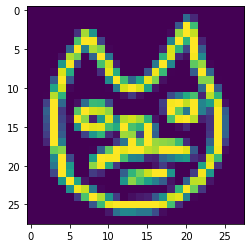

Raw image:
There are 9 number of strokes in this raw image file!


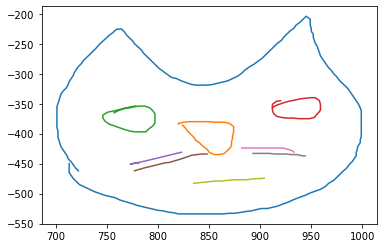

In [93]:
print('There are ', len(npy_data)+1, ' images in selected category', categories[category])
index=int(input("Select an index value from 0 to " + str((len(npy_data)*8)//10) + " to display and compare bitmap and raw images:"))
print("Selected index: {}".format(index))
plot_bitmap(index)
plt.show()
plot_raw(index)

In [94]:
# TRAIN TEST SPLIT
filepath = paths_dict['input_path']
x_train, x_test, y_train, y_test = split_data(filepath, categories[category], shuffle=False)

In [95]:
DRAW(model_path, category)

DRAW(
  (encoder): LSTMCell(306, 256)
  (mu_linear): Linear(in_features=256, out_features=10, bias=True)
  (sigma_linear): Linear(in_features=256, out_features=10, bias=True)
  (decoder): LSTMCell(10, 256)
  (dec_linear): Linear(in_features=256, out_features=5, bias=True)
  (dec_w_linear): Linear(in_features=256, out_features=25, bias=True)
  (sigmoid): Sigmoid()
)

In [96]:
train_data = Dataset(x_train)
test_data = Dataset(x_test)

In [97]:
model = DRAW(category)

In [ ]:
# TRAINING AND TESTING
print("training...")
model.start(phase='train') 

## Generating Images

In [98]:
test_model = Test(category)

In [99]:
dataloader = test_model.dataloaders['train']

In [100]:
print(dataloader.data.shape)

(98561, 784)


In [142]:
for i in range((index//64)+1):
    data = dataloader.next_batch(test_model.batch_size)

In [102]:
data.shape

(64, 784)

In [103]:
print(index)

1300


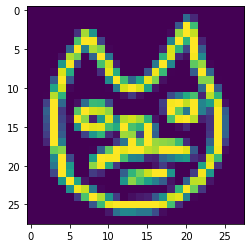

In [104]:
plt.imshow(npy_data[index].reshape(28,28))

In [105]:
print(test_model.get_image_location(index%64))

{'startr': 60, 'endr': 90, 'startc': 120, 'endc': 150}


In [106]:
print(index%64)

20


reconstructing images...
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_test_0.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_test_1.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_test_2.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_test_3.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_test_4.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_test_5.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_test_6.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_test_7.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_test_8.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_test_9.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_test_10.png
C:\Use

array([[5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01],
       [5.00000000e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        3.19273444e-29, 1.31110784e-18, 4.28252052e-12, 4.90661822e-09,
        2.84066051e-08, 7.06747105e-09, 3.05887260e-10, 6.72290956e-12,
        1.72813356e-13, 8.67047489e-15, 1.18711731e-15, 6.46082163e-16,
        2.01346995e-15, 4.07838538e-14, 4.27586872e-12, 1.25303667e-09,
        3.43772115e-07, 1.84284036e-05, 3.25758629e-05, 3.05227616e-07,
        1.63680462e-12,

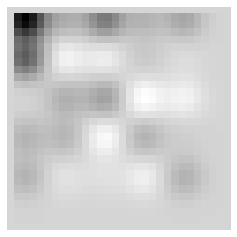

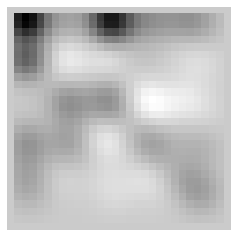

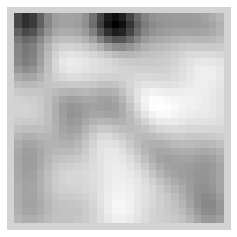

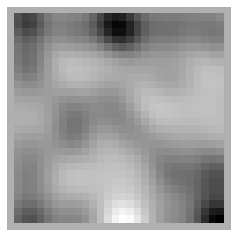

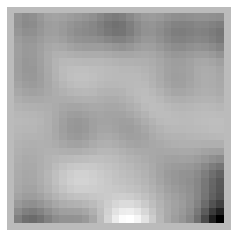

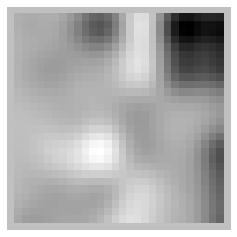

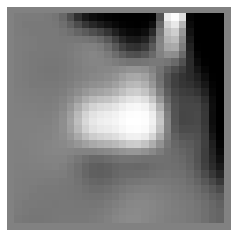

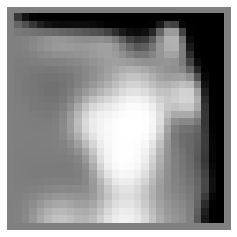

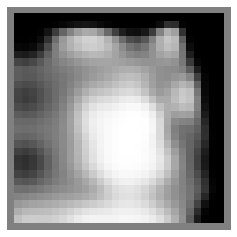

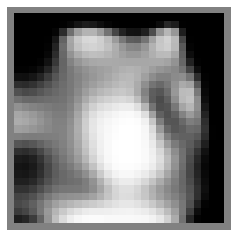

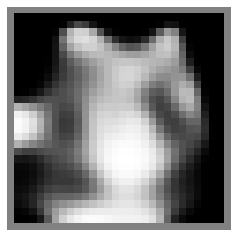

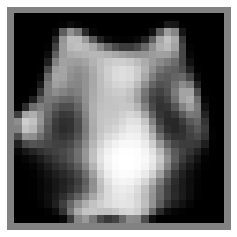

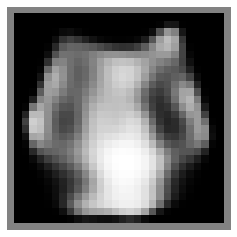

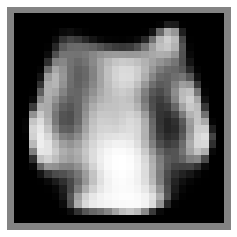

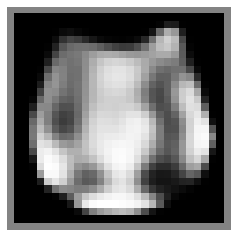

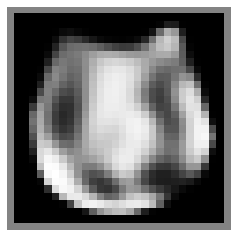

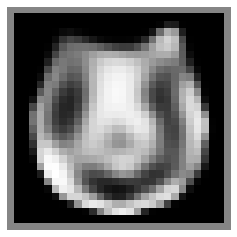

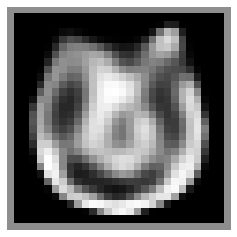

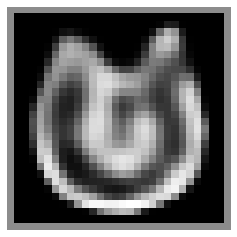

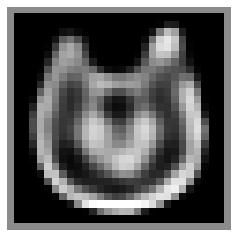

In [107]:
print("reconstructing images...")
test_model.xrecons_grid(index%64, data)

Select an index value from 0 to 24641 to display and compare bitmap and raw images:1
Bitmap image:


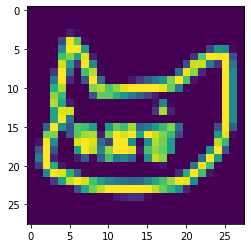

Raw image:
There are 12 number of strokes in this raw image file!


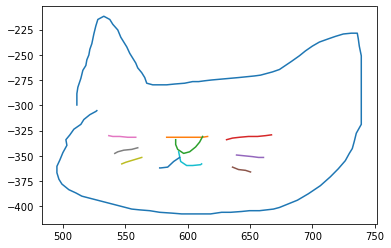

In [168]:
index_test=int(input("Select an index value from 0 to " + str((len(npy_data)-dataloader.data.shape[0])) + " to display and compare bitmap and raw images:"))
index_raw=dataloader.data.shape[0] + (index_test%64)
plot_bitmap(index_raw)
plt.show()
plot_raw(index_raw)

In [169]:
test_model_test = Test(category)

In [170]:
dataloader_test = test_model_test.dataloaders['test']

In [171]:
print(dataloader_test.data.shape)

(24641, 784)


In [172]:
for i in range((index_test//64)+1):
    data_test = dataloader_test.next_batch(test_model_test.batch_size)

In [173]:
data_test.shape

(64, 784)

In [174]:
print(index_test%64)

1


reconstructing images...
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_test_0.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_test_1.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_test_2.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_test_3.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_test_4.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_test_5.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_test_6.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_test_7.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_test_8.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_test_9.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_test_10.png
C:\Use

array([[5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01],
       [5.00000000e-01, 0.00000000e+00, 9.61389810e-31, 4.11477579e-24,
        8.58065921e-20, 2.95994366e-16, 8.10309055e-14, 1.98973731e-13,
        2.27292546e-15, 6.44289376e-19, 5.25233152e-23, 6.40989545e-27,
        2.65397623e-30, 6.53911785e-33, 1.17957173e-34, 9.35116662e-36,
        1.24900598e-36, 1.37309907e-37, 1.35150613e-38, 4.06316159e-39,
        3.00025540e-38, 2.42254893e-35, 1.13543313e-30, 2.60185629e-25,
        1.85151165e-20,

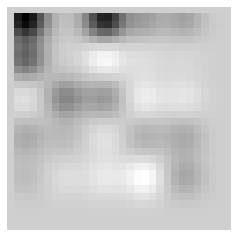

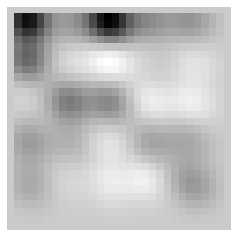

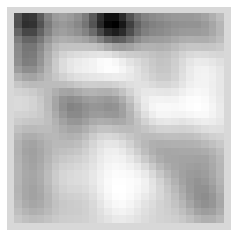

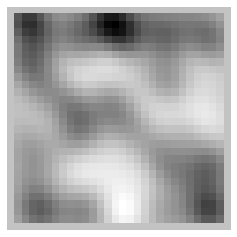

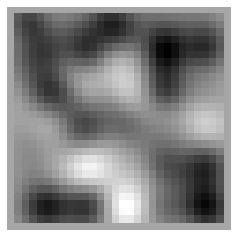

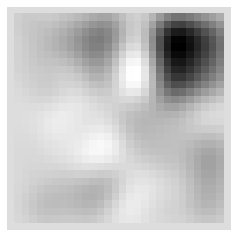

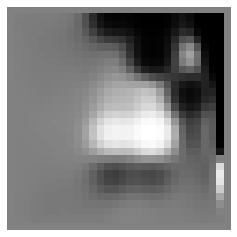

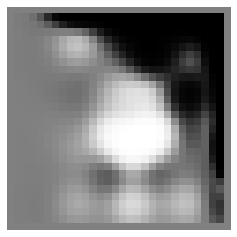

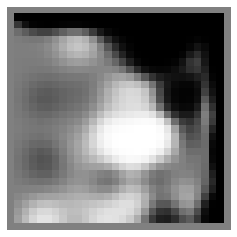

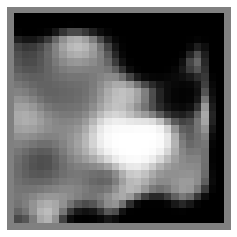

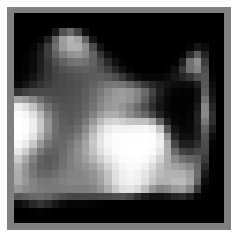

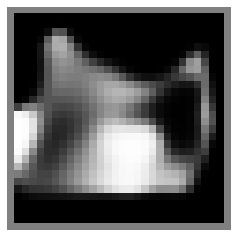

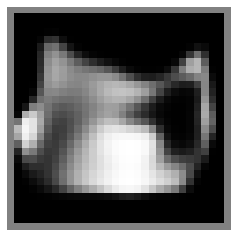

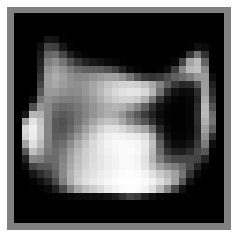

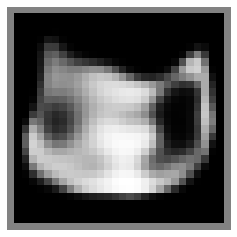

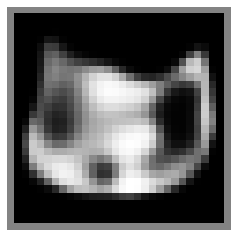

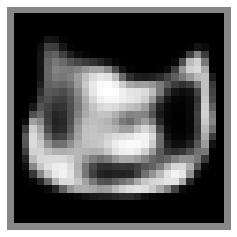

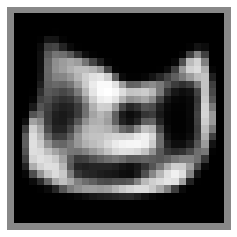

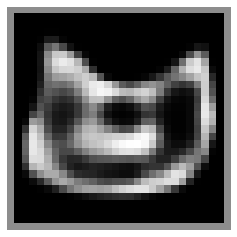

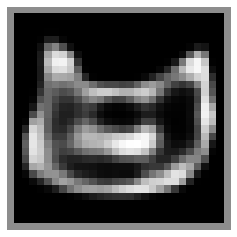

In [175]:
print("reconstructing images...")
test_model_test.xrecons_grid(index_test%64, data_test)